In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

# Data visualisation
import sklearn.metrics as metrics
import scipy.stats as stats

In [2]:
# Getting Datasets
merged_df = pd.read_csv("cleaned_dataset.csv")

In [3]:
# Remove unnesscary columns
merged_df = merged_df.drop(['FLAG_OWN_CAR','FLAG_OWN_REALTY','DAYS_BIRTH','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], axis=1)

# Filling the NULL valus in Occupation Type in ar
merged_df['OCCUPATION_TYPE'].fillna(value="NA", inplace= True)

print(merged_df)

       Unnamed: 0       ID  STATUS CODE_GENDER  CNT_CHILDREN  \
0               0  5008804     1.0           M             0   
1               1  5008805     1.0           M             0   
2               2  5008806     1.0           M             0   
3               3  5008808     1.0           F             0   
4               4  5008809     0.0           F             0   
...           ...      ...     ...         ...           ...   
36452       36452  5150482     1.0           F             1   
36453       36453  5150483     0.0           F             1   
36454       36454  5150484     1.0           F             1   
36455       36455  5150485     1.0           F             1   
36456       36456  5150487     0.0           M             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              427500.0               Working               Higher education   
1              427500.0               Working               Higher educ

## Exploratory Data Analysis 

In this section, we will be visualising 10 variables: Total Income, Education Type, Marital Status, Employment Status, Occupation Type, Number of Family Members, Gender, Number of Children, Housing Type and Income Type. We will be visualising the variables mentioned above through graphs such as clustered bar-plots and heatmaps as well as the chi-squared test. 

We have chosen to remove variables like Car Ownership, Property Ownership, Birthday, Phone Ownership, Email Ownership, Mobile Phone Ownership and Work Phone Ownership as we believe that those variables do not play a significant part in affecting one's ability to pay their loans on time.

### Total Income

In [4]:
# Create Income ranges for numerical data Total income for better visualisation
merged_df["Income Range"] = pd.cut(merged_df["AMT_INCOME_TOTAL"], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000],
                            labels=["<$50k", "$50k-$100k", "$100k-$150k", "$150k-$200k", "$200k-$250k", ">$250k"])

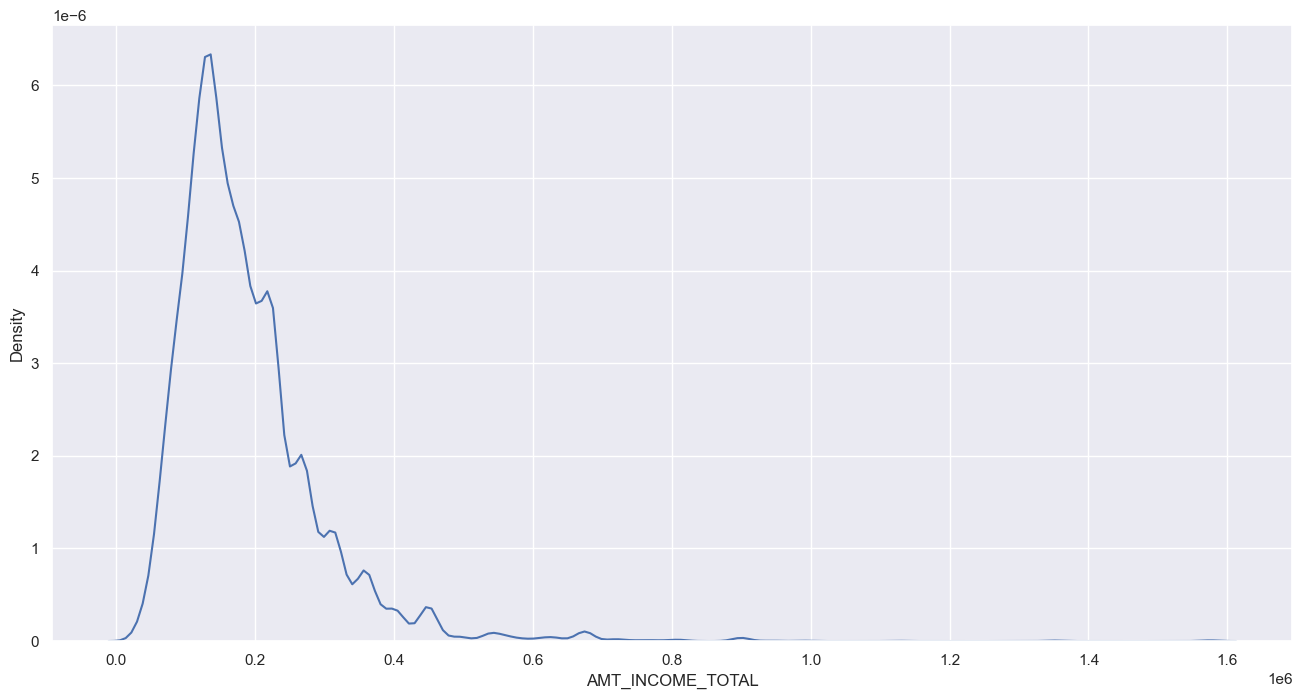

In [5]:
# Plot KDE for numerical data Total income
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = merged_df["AMT_INCOME_TOTAL"])
plt.show()

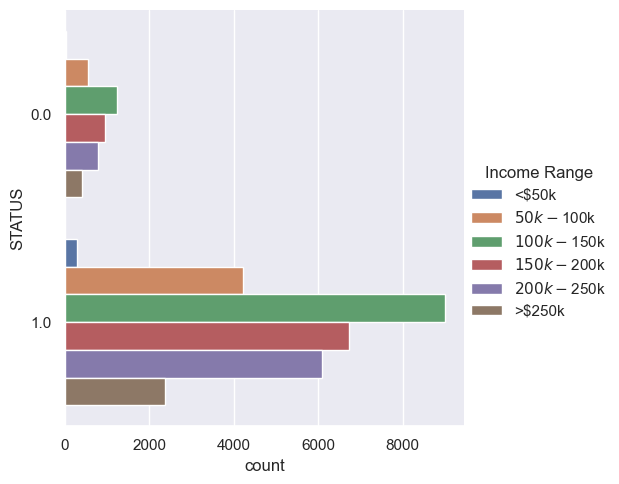

In [6]:
# Plot of Income against Status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="Income Range")
plt.show()

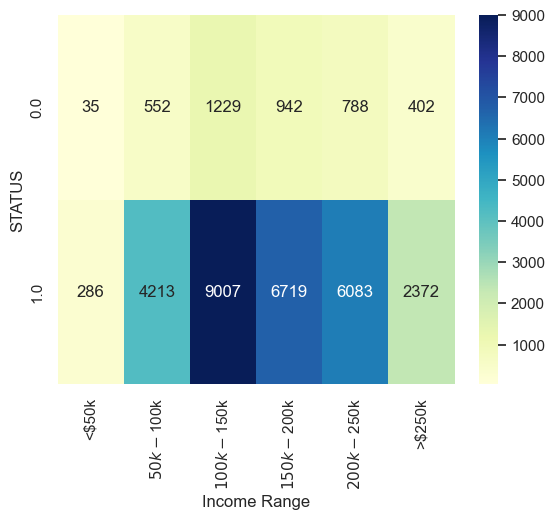

In [7]:
# Create a frequency table 
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['Income Range'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [8]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["Income Range"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 19.48
P-value: 0.0016
Degrees of freedom: 5
Expected frequencies:
[[  38.84111806  576.56675248 1238.55976462  926.98381758  831.39352703
   335.65502023]
 [ 282.15888194 4188.43324752 8997.44023538 6734.01618242 6039.60647297
  2438.34497977]]


### Education Type

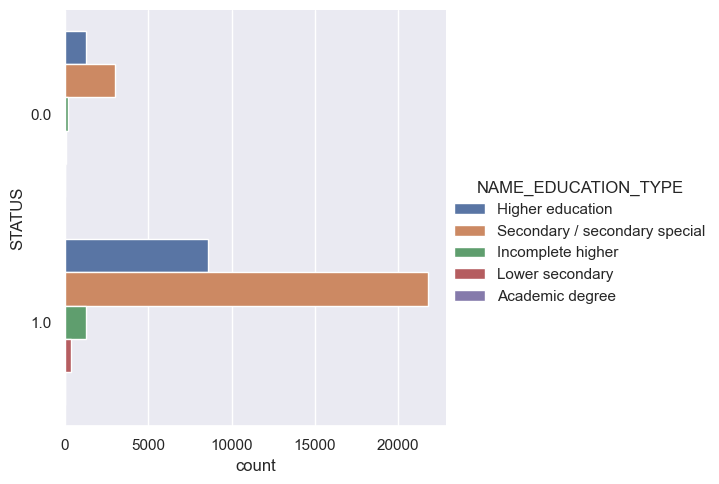

In [9]:
# Plot of education type against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="NAME_EDUCATION_TYPE")
plt.show()

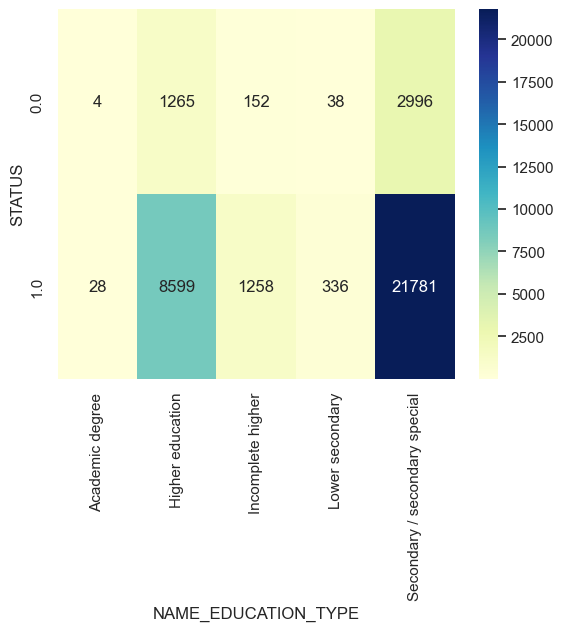

In [10]:
# Create a frequency table 
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['NAME_EDUCATION_TYPE'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [11]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["NAME_EDUCATION_TYPE"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 7.95
P-value: 0.0936
Degrees of freedom: 4
Expected frequencies:
[[3.91036015e+00 1.20536852e+03 1.72300244e+02 4.57023343e+01
  3.02771855e+03]
 [2.80896398e+01 8.65863148e+03 1.23769976e+03 3.28297666e+02
  2.17492815e+04]]


### Marital Status

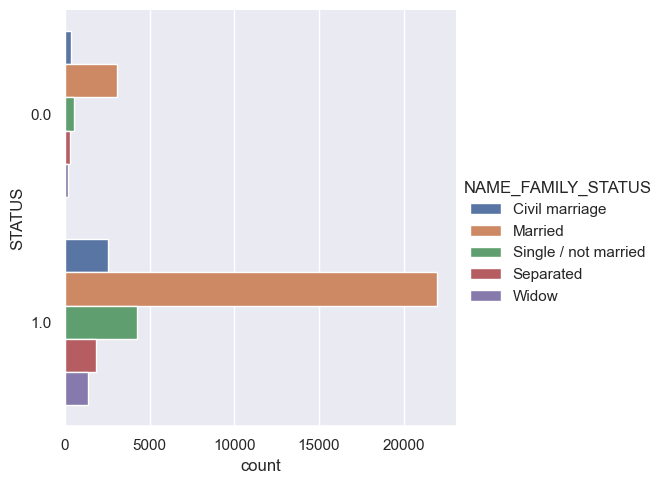

In [12]:
# Plot of marital status against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="NAME_FAMILY_STATUS")
plt.show()

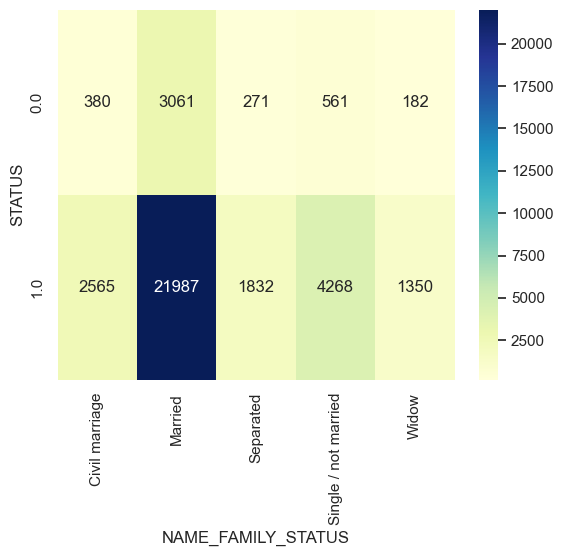

In [13]:
# Create a frequency table
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['NAME_FAMILY_STATUS'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [14]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["NAME_FAMILY_STATUS"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 3.95
P-value: 0.4125
Degrees of freedom: 4
Expected frequencies:
[[  359.87533258  3060.83440766   256.98398113   590.09778643
    187.2084922 ]
 [ 2585.12466742 21987.16559234  1846.01601887  4238.90221357
   1344.7915078 ]]


### Employment Status

In [15]:
# Replace negative values with 1 and positive values with 0 in col1
merged_df['DAYS_EMPLOYED'] = merged_df['DAYS_EMPLOYED'].apply(lambda x: 1 if x < 0 else 0)

print(merged_df)

       Unnamed: 0       ID  STATUS CODE_GENDER  CNT_CHILDREN  \
0               0  5008804     1.0           M             0   
1               1  5008805     1.0           M             0   
2               2  5008806     1.0           M             0   
3               3  5008808     1.0           F             0   
4               4  5008809     0.0           F             0   
...           ...      ...     ...         ...           ...   
36452       36452  5150482     1.0           F             1   
36453       36453  5150483     0.0           F             1   
36454       36454  5150484     1.0           F             1   
36455       36455  5150485     1.0           F             1   
36456       36456  5150487     0.0           M             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              427500.0               Working               Higher education   
1              427500.0               Working               Higher educ

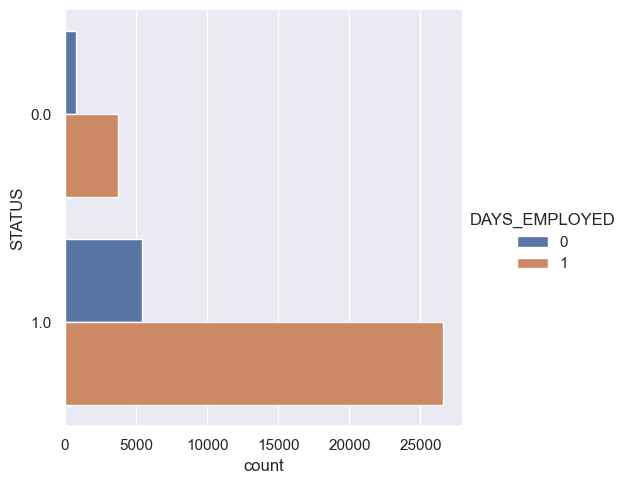

In [16]:
# Plot of employment against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="DAYS_EMPLOYED")
plt.show()

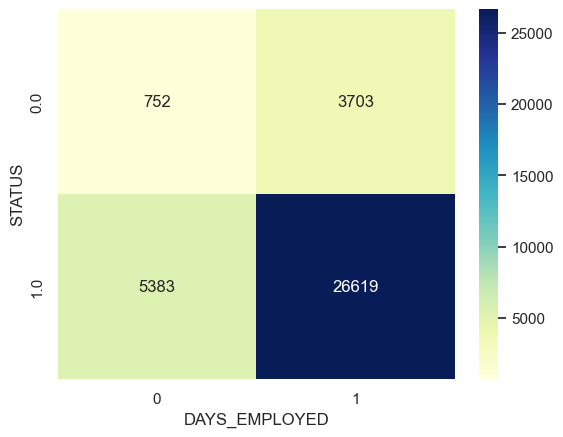

In [17]:
# Create a frequency table 
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['DAYS_EMPLOYED'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [18]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["DAYS_EMPLOYED"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 0.01
P-value: 0.9383
Degrees of freedom: 1
Expected frequencies:
[[  749.68936007  3705.31063993]
 [ 5385.31063993 26616.68936007]]


### Occupation Type

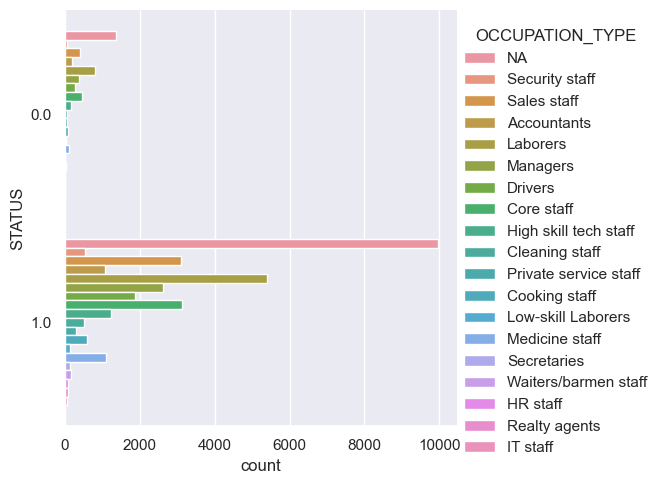

In [19]:
# Plot of occupation type against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="OCCUPATION_TYPE")
plt.show()

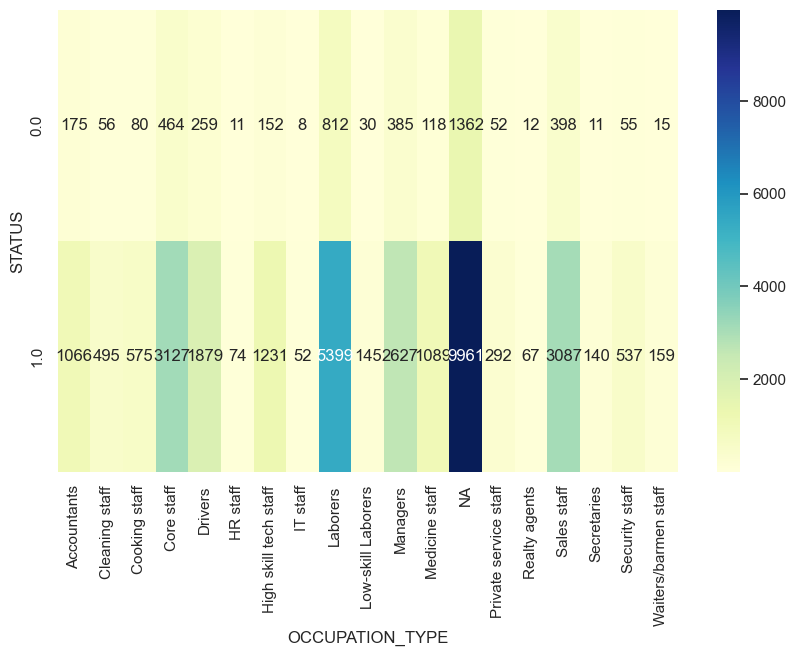

In [20]:
# Create a frequency table
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['OCCUPATION_TYPE'])

# Create a larger figure to make the heatmap wider
fig, ax = plt.subplots(figsize=(10, 6))

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [21]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["OCCUPATION_TYPE"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 41.85
P-value: 0.0012
Degrees of freedom: 18
Expected frequencies:
[[1.51648655e+02 6.73315138e+01 8.00401843e+01 4.38815728e+02
  2.61260938e+02 1.03868941e+01 1.69000878e+02 7.33192528e+00
  7.58976465e+02 2.13847821e+01 3.68062649e+02 1.47493897e+02
  1.38365650e+03 4.20363716e+01 9.65370162e+00 4.25862660e+02
  1.84520120e+01 7.23416628e+01 2.12625833e+01]
 [1.08935135e+03 4.83668486e+02 5.74959816e+02 3.15218427e+03
  1.87673906e+03 7.46131059e+01 1.21399912e+03 5.26680747e+01
  5.45202353e+03 1.53615218e+02 2.64393735e+03 1.05950610e+03
  9.93934350e+03 3.01963628e+02 6.93462984e+01 3.05913734e+03
  1.32547988e+02 5.19658337e+02 1.52737417e+02]]


### Number of Family Members

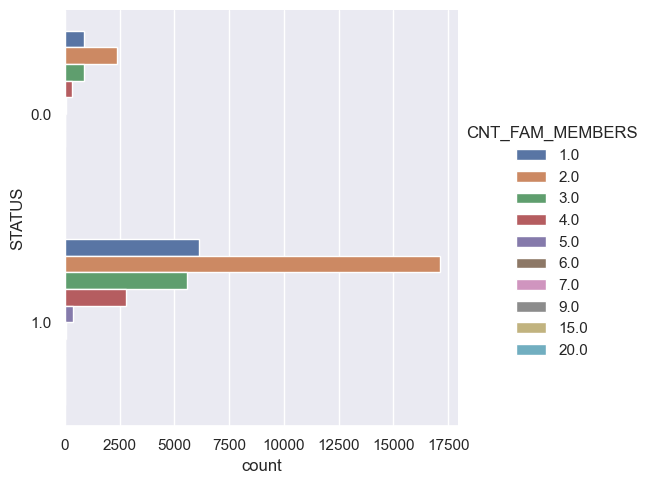

In [22]:
# Plot of family members against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="CNT_FAM_MEMBERS")
plt.show()

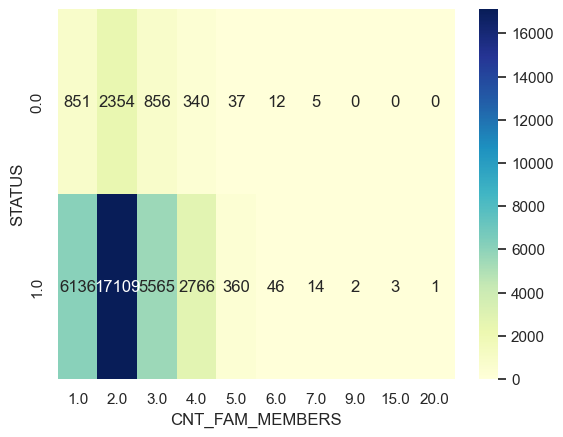

In [23]:
# Create a frequency table 
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['CNT_FAM_MEMBERS'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [24]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["CNT_FAM_MEMBERS"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 23.73
P-value: 0.0048
Degrees of freedom: 9
Expected frequencies:
[[8.53802699e+02 2.37835436e+03 7.84638204e+02 3.79549332e+02
  4.85129056e+01 7.08752777e+00 2.32177634e+00 2.44397509e-01
  3.66596264e-01 1.22198755e-01]
 [6.13319730e+03 1.70846456e+04 5.63636180e+03 2.72645067e+03
  3.48487094e+02 5.09124722e+01 1.66782237e+01 1.75560249e+00
  2.63340374e+00 8.77801245e-01]]


### Gender

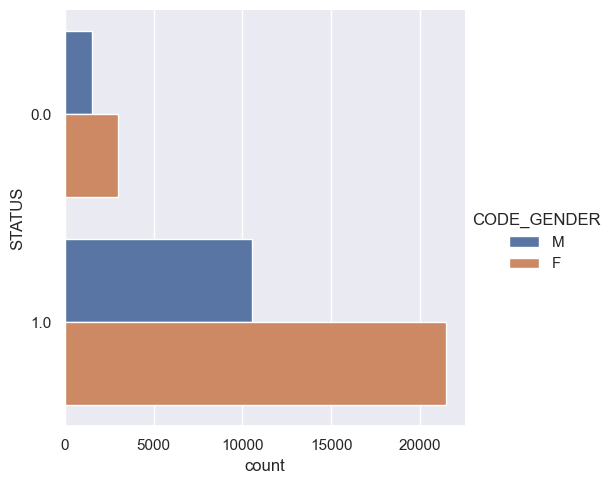

In [25]:
# Plot of gender against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="CODE_GENDER")
plt.show()

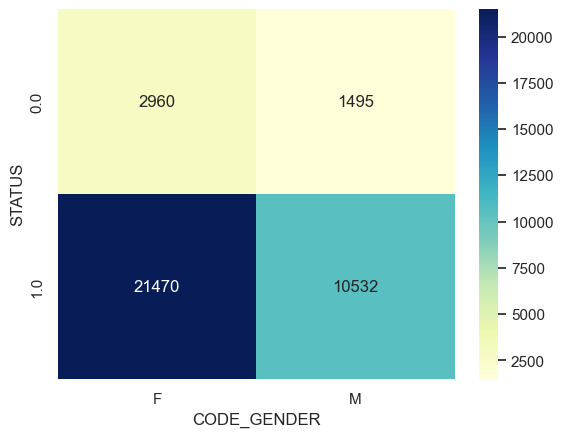

In [26]:
# Create a frequency table 
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['CODE_GENDER'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [27]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["CODE_GENDER"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 0.71
P-value: 0.3987
Degrees of freedom: 1
Expected frequencies:
[[ 2985.31557726  1469.68442274]
 [21444.68442274 10557.31557726]]


### Number of Children

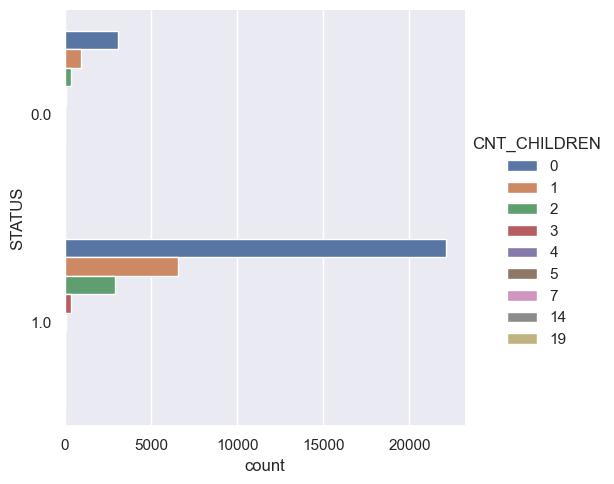

In [28]:
# Plot of children against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="CNT_CHILDREN")
plt.show()

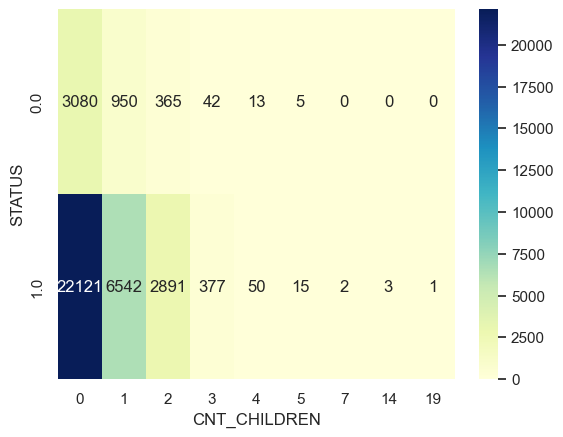

In [29]:
# Create a frequency table of the two categorical variables
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['CNT_CHILDREN'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [30]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["CNT_CHILDREN"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 14.50
P-value: 0.0697
Degrees of freedom: 8
Expected frequencies:
[[3.07953082e+03 9.15513070e+02 3.97879145e+02 5.12012782e+01
  7.69852155e+00 2.44397509e+00 2.44397509e-01 3.66596264e-01
  1.22198755e-01]
 [2.21214692e+04 6.57648693e+03 2.85812085e+03 3.67798722e+02
  5.53014785e+01 1.75560249e+01 1.75560249e+00 2.63340374e+00
  8.77801245e-01]]


### Housing Type

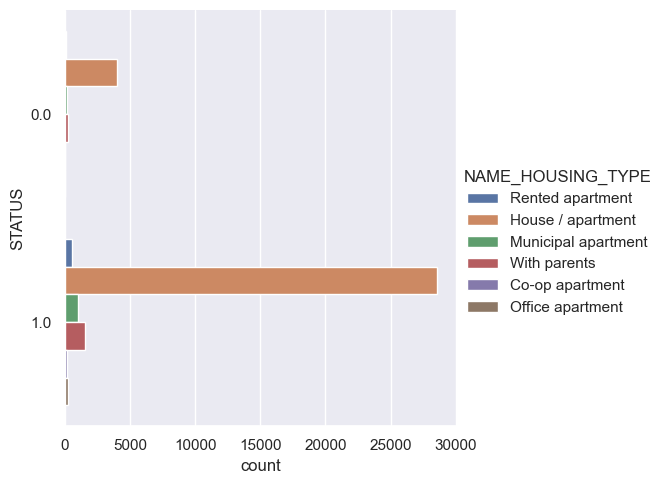

In [31]:
# plot of housing type against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="NAME_HOUSING_TYPE")
plt.show()

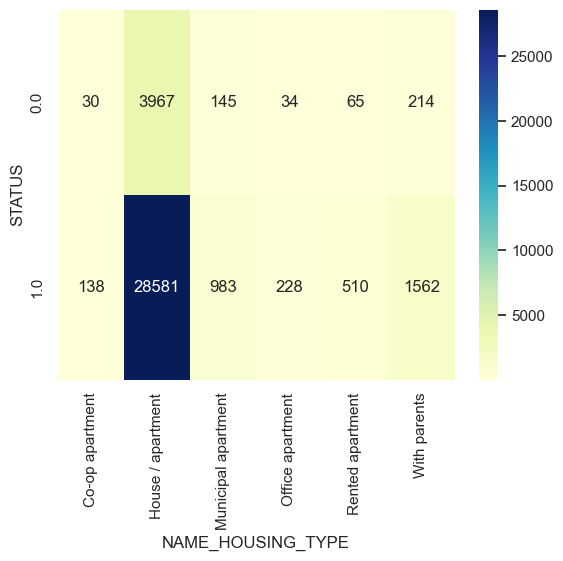

In [32]:
# Create a frequency table
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['NAME_HOUSING_TYPE'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [33]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["NAME_HOUSING_TYPE"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 6.07
P-value: 0.2996
Degrees of freedom: 5
Expected frequencies:
[[2.05293908e+01 3.97732507e+03 1.37840195e+02 3.20160737e+01
  7.02642840e+01 2.17024988e+02]
 [1.47470609e+02 2.85706749e+04 9.90159805e+02 2.29983926e+02
  5.04735716e+02 1.55897501e+03]]


### Income Type

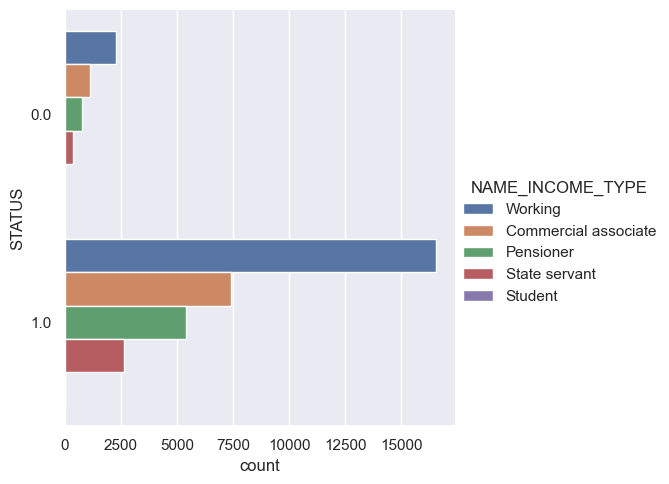

In [34]:
# Plot of income type against status
sb.catplot(y="STATUS",data= merged_df,kind="count",hue="NAME_INCOME_TYPE")
plt.show()

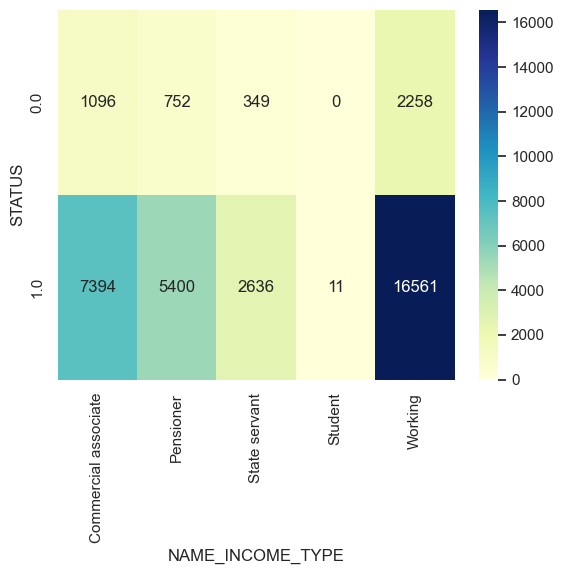

In [35]:
# Create a frequency table of the two categorical variables
freq_table = pd.crosstab(merged_df['STATUS'], merged_df['NAME_INCOME_TYPE'])

# Create a heatmap from the frequency table
sb.heatmap(freq_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [36]:
# Create a contingency table of counts
cont_table = pd.crosstab(merged_df["STATUS"], merged_df["NAME_INCOME_TYPE"])

# Perform chi-square test
chi2, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(exp_freq)

Chi-square test results:
Chi-square statistic: 6.93
P-value: 0.1397
Degrees of freedom: 4
Expected frequencies:
[[1.03746743e+03 7.51766739e+02 3.64763283e+02 1.34418630e+00
  2.29965836e+03]
 [7.45253257e+03 5.40023326e+03 2.62023672e+03 9.65581370e+00
  1.65193416e+04]]


In [38]:
merged_df.to_csv('ml_dataset.csv')

From the visualisation, one common trend we seem to notice was that there was a lot of data points for 1s (Status) which showed us that the class distribution is skewed towards one class since the dataset is imbalanced. This is something we plan to address when further preparing our data for machine learning as this might pose challenges by leading to biased models that perform poorly on the minority class 0 during the ml part. Additionally, based on the chi squared test (if the p-value is less than 0.05) and the trends displayed we have decided to apply machine learning on the variables: Total income, Occupation type, Number of Family members and Education type.